# Promedios móviles


## Parte 1

### Esta es la primera actividad en jupyter

In [1]:
import pandas as pd

In [2]:
from sklearn.metrics import mean_absolute_error

In [3]:
import matplotlib.pyplot as plt

In [4]:
datos = pd.read_csv("E:/The Last Dance/Lab Diseño y Opt/datos_completos.csv")

In [5]:
datos.head()

,pdv_id,mes_id,sku_id,ventas_totales,y_ventas_siguiente_mes,ventas_totales_en_tienda_de_cada_mes,ventas_promedio_en_tienda_de_cada_mes,ventas_totales_en_tienda_de_cada_sku,ventas_promedio_en_tienda_de_cada_sku,ventas_totales_1_mes_pasado,...,ventas_totales_tienda_y_mes_3_pasado,ventas_promedio_tienda_y_mes_del_mes_pasado,ventas_promedio_tienda_y_mes_2_pasado,ventas_promedio_tienda_y_mes_3_pasado,ventas_totales_tienda_y_sku_del_mes_pasado,ventas_totales_tienda_y_sku_2_pasado,ventas_totales_tienda_y_sku_3_pasado,ventas_promedio_tienda_y_sku_del_mes_pasado,ventas_promedio_tienda_y_sku_2_pasado,ventas_promedio_tienda_y_sku_3_pasado
0,1,0,1,1,0,1,0.02439,379,0.293117,1,...,1,0.02439,0.02439,0.02439,379,379,379,0.293117,0.293117,0.293117
1,1,1,1,0,0,0,0.00000,395,0.305491,1,...,1,0.02439,0.02439,0.02439,379,379,379,0.293117,0.293117,0.293117
2,1,2,1,0,0,0,0.00000,320,0.247486,0,...,1,0.00000,0.02439,0.02439,395,379,379,0.305491,0.293117,0.293117
3,1,3,1,0,0,0,0.00000,287,0.221964,0,...,1,0.00000,0.00000,0.02439,320,395,379,0.247486,0.305491,0.293117
4,1,4,1,0,0,0,0.00000,147,0.113689,0,...,0,0.00000,0.00000,0.00000,287,320,395,0.221964,0.247486,0.305491


In [6]:
datos.shape

(68999, 24)

In [7]:
datos.columns

Index(['pdv_id', 'mes_id', 'sku_id', 'ventas_totales',
       'y_ventas_siguiente_mes', 'ventas_totales_en_tienda_de_cada_mes',
       'ventas_promedio_en_tienda_de_cada_mes',
       'ventas_totales_en_tienda_de_cada_sku',
       'ventas_promedio_en_tienda_de_cada_sku', 'ventas_totales_1_mes_pasado',
       'ventas_totales_2_meses_pasados', 'ventas_totales_3_meses_pasados',
       'ventas_totales_tienda_y_mes_del_mes_pasado',
       'ventas_totales_tienda_y_mes_2_pasado',
       'ventas_totales_tienda_y_mes_3_pasado',
       'ventas_promedio_tienda_y_mes_del_mes_pasado',
       'ventas_promedio_tienda_y_mes_2_pasado',
       'ventas_promedio_tienda_y_mes_3_pasado',
       'ventas_totales_tienda_y_sku_del_mes_pasado',
       'ventas_totales_tienda_y_sku_2_pasado',
       'ventas_totales_tienda_y_sku_3_pasado',
       'ventas_promedio_tienda_y_sku_del_mes_pasado',
       'ventas_promedio_tienda_y_sku_2_pasado',
       'ventas_promedio_tienda_y_sku_3_pasado'],
      dtype='object')

In [8]:
datos_ma = datos.drop(['ventas_totales_en_tienda_de_cada_mes',
       'ventas_promedio_en_tienda_de_cada_mes',
       'ventas_totales_en_tienda_de_cada_sku',
       'ventas_promedio_en_tienda_de_cada_sku', 'ventas_totales_1_mes_pasado',
       'ventas_totales_2_meses_pasados', 'ventas_totales_3_meses_pasados',
       'ventas_totales_tienda_y_mes_del_mes_pasado',
       'ventas_totales_tienda_y_mes_2_pasado',
       'ventas_totales_tienda_y_mes_3_pasado',
       'ventas_promedio_tienda_y_mes_del_mes_pasado',
       'ventas_promedio_tienda_y_mes_2_pasado',
       'ventas_promedio_tienda_y_mes_3_pasado',
       'ventas_totales_tienda_y_sku_del_mes_pasado',
       'ventas_totales_tienda_y_sku_2_pasado',
       'ventas_totales_tienda_y_sku_3_pasado',
       'ventas_promedio_tienda_y_sku_del_mes_pasado',
       'ventas_promedio_tienda_y_sku_2_pasado',
       'ventas_promedio_tienda_y_sku_3_pasado'], axis=1)

In [9]:
datos_ma.head(10)

,pdv_id,mes_id,sku_id,ventas_totales,y_ventas_siguiente_mes
0,1,0,1,1,0
1,1,1,1,0,0
2,1,2,1,0,0
3,1,3,1,0,0
4,1,4,1,0,0
5,1,5,1,0,0
6,1,6,1,0,0
7,1,7,1,0,1
8,1,8,1,1,0
9,1,0,2,0,0


In [10]:
#pedir lo del mes anteior
datos_ma['m1_pedir_lo_del_mes_pasado'] = datos_ma['ventas_totales']

In [11]:
datos_ma.head(16)

,pdv_id,mes_id,sku_id,ventas_totales,y_ventas_siguiente_mes,m1_pedir_lo_del_mes_pasado
0,1,0,1,1,0,1
1,1,1,1,0,0,0
2,1,2,1,0,0,0
3,1,3,1,0,0,0
4,1,4,1,0,0,0
5,1,5,1,0,0,0
6,1,6,1,0,0,0
7,1,7,1,0,1,0
8,1,8,1,1,0,1
9,1,0,2,0,0,0


In [12]:
#Pedir un promedio de los 2 meses anteriores 
datos_ma['m2_promedio_de_dos_meses_anteriores'] = datos_ma.groupby(['pdv_id','sku_id']).rolling(2)['ventas_totales'].mean().reset_index(drop=True)


Crear nueva columna
Agrupar por punto de venta y sku
Función rolling: Proporcione cálculos de ventana rodante.
Función resent index - si no lo colocamos sale error - como tenemos un group_by el resultado en sí del comando queda como un conjunto de datos indexados, los cuales no se pueden poner en una columna, por lo tanto, hay que descartar esos índices.

In [13]:
datos_ma.head(16)

,pdv_id,mes_id,sku_id,ventas_totales,y_ventas_siguiente_mes,m1_pedir_lo_del_mes_pasado,m2_promedio_de_dos_meses_anteriores
0,1,0,1,1,0,1,NaN
1,1,1,1,0,0,0,0.5
2,1,2,1,0,0,0,0.0
3,1,3,1,0,0,0,0.0
4,1,4,1,0,0,0,0.0
5,1,5,1,0,0,0,0.0
6,1,6,1,0,0,0,0.0
7,1,7,1,0,1,0,0.0
8,1,8,1,1,0,1,0.5
9,1,0,2,0,0,0,NaN


Paso 6. Pedir un promedio de los 3 meses anteriores (1 min apróx. )

In [14]:
#Pedir un promedio de los 2 meses anteriores 
datos_ma['m3_promedio_de_tres_meses_anteriores'] = datos_ma.groupby(['pdv_id','sku_id']).rolling(3)['ventas_totales'].mean().reset_index(drop=True)
datos_ma.head(16)

,pdv_id,mes_id,sku_id,ventas_totales,y_ventas_siguiente_mes,m1_pedir_lo_del_mes_pasado,m2_promedio_de_dos_meses_anteriores,m3_promedio_de_tres_meses_anteriores
0,1,0,1,1,0,1,NaN,NaN
1,1,1,1,0,0,0,0.5,NaN
2,1,2,1,0,0,0,0.0,0.333333
3,1,3,1,0,0,0,0.0,0.000000
4,1,4,1,0,0,0,0.0,0.000000
5,1,5,1,0,0,0,0.0,0.000000
6,1,6,1,0,0,0,0.0,0.000000
7,1,7,1,0,1,0,0.0,0.000000
8,1,8,1,1,0,1,0.5,0.333333
9,1,0,2,0,0,0,NaN,NaN


Paso 7. Calcular errores

Paso 7.1 Dividir en conjuntos de datos por mes

In [15]:
error_julio= datos_ma[datos_ma.mes_id == 0]
error_julio.head(5)

,pdv_id,mes_id,sku_id,ventas_totales,y_ventas_siguiente_mes,m1_pedir_lo_del_mes_pasado,m2_promedio_de_dos_meses_anteriores,m3_promedio_de_tres_meses_anteriores
0,1,0,1,1,0,1,NaN,NaN
9,1,0,2,0,0,0,NaN,NaN
18,1,0,3,0,0,0,NaN,NaN
27,1,0,4,0,0,0,NaN,NaN
36,1,0,5,0,0,0,NaN,NaN


In [16]:
error_agosto= datos_ma[datos_ma.mes_id == 1]
error_agosto.head(5)

,pdv_id,mes_id,sku_id,ventas_totales,y_ventas_siguiente_mes,m1_pedir_lo_del_mes_pasado,m2_promedio_de_dos_meses_anteriores,m3_promedio_de_tres_meses_anteriores
1,1,1,1,0,0,0,0.5,NaN
10,1,1,2,0,0,0,0.0,NaN
19,1,1,3,0,0,0,0.0,NaN
28,1,1,4,0,0,0,0.0,NaN
37,1,1,5,0,0,0,0.0,NaN


In [17]:
error_septiembre= datos_ma[datos_ma.mes_id == 2]
error_septiembre.head(5)

,pdv_id,mes_id,sku_id,ventas_totales,y_ventas_siguiente_mes,m1_pedir_lo_del_mes_pasado,m2_promedio_de_dos_meses_anteriores,m3_promedio_de_tres_meses_anteriores
2,1,2,1,0,0,0,0.0,0.333333
11,1,2,2,0,0,0,0.0,0.000000
20,1,2,3,0,0,0,0.0,0.000000
29,1,2,4,0,0,0,0.0,0.000000
38,1,2,5,0,0,0,0.0,0.000000


In [18]:
error_octubre= datos_ma[datos_ma.mes_id == 3]
error_octubre.head(5)

,pdv_id,mes_id,sku_id,ventas_totales,y_ventas_siguiente_mes,m1_pedir_lo_del_mes_pasado,m2_promedio_de_dos_meses_anteriores,m3_promedio_de_tres_meses_anteriores
3,1,3,1,0,0,0,0.0,0.0
12,1,3,2,0,0,0,0.0,0.0
21,1,3,3,0,0,0,0.0,0.0
30,1,3,4,0,0,0,0.0,0.0
39,1,3,5,0,0,0,0.0,0.0


In [19]:
error_noviembre= datos_ma[datos_ma.mes_id == 4]
error_noviembre.head(5)

,pdv_id,mes_id,sku_id,ventas_totales,y_ventas_siguiente_mes,m1_pedir_lo_del_mes_pasado,m2_promedio_de_dos_meses_anteriores,m3_promedio_de_tres_meses_anteriores
4,1,4,1,0,0,0,0.0,0.0
13,1,4,2,0,0,0,0.0,0.0
22,1,4,3,0,0,0,0.0,0.0
31,1,4,4,0,0,0,0.0,0.0
40,1,4,5,0,0,0,0.0,0.0


In [20]:
error_diciembre= datos_ma[datos_ma.mes_id == 5]
error_diciembre.head(5)

,pdv_id,mes_id,sku_id,ventas_totales,y_ventas_siguiente_mes,m1_pedir_lo_del_mes_pasado,m2_promedio_de_dos_meses_anteriores,m3_promedio_de_tres_meses_anteriores
5,1,5,1,0,0,0,0.0,0.0
14,1,5,2,0,1,0,0.0,0.0
23,1,5,3,0,0,0,0.0,0.0
32,1,5,4,0,0,0,0.0,0.0
41,1,5,5,0,0,0,0.0,0.0


In [21]:
error_enero= datos_ma[datos_ma.mes_id == 6]
error_enero.head(5)

,pdv_id,mes_id,sku_id,ventas_totales,y_ventas_siguiente_mes,m1_pedir_lo_del_mes_pasado,m2_promedio_de_dos_meses_anteriores,m3_promedio_de_tres_meses_anteriores
6,1,6,1,0,0,0,0.0,0.000000
15,1,6,2,1,0,1,0.5,0.333333
24,1,6,3,0,0,0,0.0,0.000000
33,1,6,4,0,0,0,0.0,0.000000
42,1,6,5,0,0,0,0.0,0.000000


In [22]:
error_febrero= datos_ma[datos_ma.mes_id == 7]
error_febrero.head(5)

,pdv_id,mes_id,sku_id,ventas_totales,y_ventas_siguiente_mes,m1_pedir_lo_del_mes_pasado,m2_promedio_de_dos_meses_anteriores,m3_promedio_de_tres_meses_anteriores
7,1,7,1,0,1,0,0.0,0.000000
16,1,7,2,0,1,0,0.5,0.333333
25,1,7,3,0,0,0,0.0,0.000000
34,1,7,4,0,0,0,0.0,0.000000
43,1,7,5,0,0,0,0.0,0.000000


In [23]:
error_febrero.shape

(7666, 8)

In [24]:
error_marzo= datos_ma[datos_ma.mes_id == 8]
error_marzo.head(5)

,pdv_id,mes_id,sku_id,ventas_totales,y_ventas_siguiente_mes,m1_pedir_lo_del_mes_pasado,m2_promedio_de_dos_meses_anteriores,m3_promedio_de_tres_meses_anteriores
8,1,8,1,1,0,1,0.5,0.333333
17,1,8,2,1,0,1,0.5,0.666667
26,1,8,3,0,0,0,0.0,0.000000
35,1,8,4,0,0,0,0.0,0.000000
44,1,8,5,0,0,0,0.0,0.000000


In [25]:
error_marzo.shape

(7666, 8)

Paso 7.2. Calcular el error mes/modelo (un valor por objeto creado)

In [26]:
#cálculo manual 
#sum(abs(error_julio['y_ventas_siguiente_mes'] - error_julio['m1_pedir_lo_del_mes_pasado']))/64600
error_m1_julio = mean_absolute_error(error_julio['y_ventas_siguiente_mes'], error_julio['m1_pedir_lo_del_mes_pasado'])
error_m2_julio = None
error_m3_julio = None


In [27]:
error_m1_agosto = mean_absolute_error(error_agosto['y_ventas_siguiente_mes'], error_agosto['m1_pedir_lo_del_mes_pasado'])
error_m2_agosto = mean_absolute_error(error_agosto['y_ventas_siguiente_mes'], error_agosto['m2_promedio_de_dos_meses_anteriores'])
error_m3_agosto = None


In [28]:
error_m1_septiembre = mean_absolute_error(error_septiembre['y_ventas_siguiente_mes'], error_septiembre['m1_pedir_lo_del_mes_pasado'])
error_m2_septiembre = mean_absolute_error(error_septiembre['y_ventas_siguiente_mes'], error_septiembre['m2_promedio_de_dos_meses_anteriores'])
error_m3_septiembre = mean_absolute_error(error_septiembre['y_ventas_siguiente_mes'], error_septiembre['m3_promedio_de_tres_meses_anteriores'])


In [29]:
error_m1_octubre = mean_absolute_error(error_octubre['y_ventas_siguiente_mes'], error_octubre['m1_pedir_lo_del_mes_pasado'])
error_m2_octubre = mean_absolute_error(error_octubre['y_ventas_siguiente_mes'], error_octubre['m2_promedio_de_dos_meses_anteriores'])
error_m3_octubre = mean_absolute_error(error_octubre['y_ventas_siguiente_mes'], error_octubre['m3_promedio_de_tres_meses_anteriores'])


In [30]:
error_m1_noviembre = mean_absolute_error(error_noviembre['y_ventas_siguiente_mes'], error_noviembre['m1_pedir_lo_del_mes_pasado'])
error_m2_noviembre = mean_absolute_error(error_noviembre['y_ventas_siguiente_mes'], error_noviembre['m2_promedio_de_dos_meses_anteriores'])
error_m3_noviembre = mean_absolute_error(error_noviembre['y_ventas_siguiente_mes'], error_noviembre['m3_promedio_de_tres_meses_anteriores'])


In [31]:
error_m1_diciembre = mean_absolute_error(error_diciembre['y_ventas_siguiente_mes'], error_diciembre['m1_pedir_lo_del_mes_pasado'])
error_m2_diciembre = mean_absolute_error(error_diciembre['y_ventas_siguiente_mes'], error_diciembre['m2_promedio_de_dos_meses_anteriores'])
error_m3_diciembre = mean_absolute_error(error_diciembre['y_ventas_siguiente_mes'], error_diciembre['m3_promedio_de_tres_meses_anteriores'])


In [32]:
error_m1_enero = mean_absolute_error(error_enero['y_ventas_siguiente_mes'], error_enero['m1_pedir_lo_del_mes_pasado'])
error_m2_enero = mean_absolute_error(error_enero['y_ventas_siguiente_mes'], error_enero['m2_promedio_de_dos_meses_anteriores'])
error_m3_enero = mean_absolute_error(error_enero['y_ventas_siguiente_mes'], error_enero['m3_promedio_de_tres_meses_anteriores'])


In [33]:
error_m1_febrero = mean_absolute_error(error_febrero['y_ventas_siguiente_mes'], error_febrero['m1_pedir_lo_del_mes_pasado'])
error_m2_febrero = mean_absolute_error(error_febrero['y_ventas_siguiente_mes'], error_febrero['m2_promedio_de_dos_meses_anteriores'])
error_m3_febrero = mean_absolute_error(error_febrero['y_ventas_siguiente_mes'], error_febrero['m3_promedio_de_tres_meses_anteriores'])


In [34]:
error_m1_marzo = mean_absolute_error(error_marzo['y_ventas_siguiente_mes'], error_marzo['m1_pedir_lo_del_mes_pasado'])
error_m2_marzo = mean_absolute_error(error_marzo['y_ventas_siguiente_mes'], error_marzo['m2_promedio_de_dos_meses_anteriores'])
error_m3_marzo = mean_absolute_error(error_marzo['y_ventas_siguiente_mes'], error_marzo['m3_promedio_de_tres_meses_anteriores'])




Paso 7.3 Crear dataframe con errores

In [38]:
errores_mae = [['Julio', error_m1_julio, error_m2_julio, error_m3_julio],
               ['Agosto', error_m1_agosto, error_m2_agosto, error_m3_agosto],
               ['Septiembre', error_m1_septiembre, error_m2_septiembre, error_m3_septiembre],
               ['Octubre', error_m1_octubre, error_m2_octubre, error_m3_octubre],
               ['Noviembre', error_m1_noviembre, error_m2_noviembre, error_m3_noviembre],
               ['Diciembre', error_m1_diciembre, error_m2_diciembre, error_m3_diciembre],
               ['Enero', error_m1_enero, error_m2_enero, error_m3_enero],
               ['Febrero', error_m1_febrero, error_m2_febrero, error_m3_febrero],
               ['Marzo', error_m1_marzo, error_m2_marzo, error_m3_marzo]
              ]


In [39]:
errores_mae

[['Julio', 0.05282379026998826, None, None],
 ['Agosto', 0.03691143863310291, 0.04362853788965697, None],
 ['Septiembre',
  0.025433676796661014,
  0.029020477370549108,
  0.03452023825051085],
 ['Octubre', 0.007304030259553933, 0.015977566192774226, 0.021346897960958223],
 ['Noviembre',
  0.004695448023998957,
  0.006260597365331942,
  0.012390765618886135],
 ['Diciembre',
  0.0054787372815027395,
  0.0052178450300026085,
  0.006348378119836507],
 ['Enero', 0.005870075658752935, 0.006652752413253326, 0.006652752413253327],
 ['Febrero', 0.022045395251761024, 0.021327941560135663, 0.021175754413427256],
 ['Marzo', 0.01891468823375946, 0.012327158883381163, 0.009305156970171318]]

In [40]:
mae = pd.DataFrame(errores_mae, columns = ['Mes', 'mae_pedir_anterior','mae_promedio_2_meses_anteriores','mae_promedio_3_meses_anteriores'])
mae

,Mes,mae_pedir_anterior,mae_promedio_2_meses_anteriores,mae_promedio_3_meses_anteriores
0,Julio,0.052824,NaN,NaN
1,Agosto,0.036911,0.043629,NaN
2,Septiembre,0.025434,0.029020,0.034520
3,Octubre,0.007304,0.015978,0.021347
4,Noviembre,0.004695,0.006261,0.012391
5,Diciembre,0.005479,0.005218,0.006348
6,Enero,0.005870,0.006653,0.006653
7,Febrero,0.022045,0.021328,0.021176
8,Marzo,0.018915,0.012327,0.009305


Paso 7.4 Crear gráfica

Text(0.5, 1.0, 'Error Absoluto Total en Modelos Base')

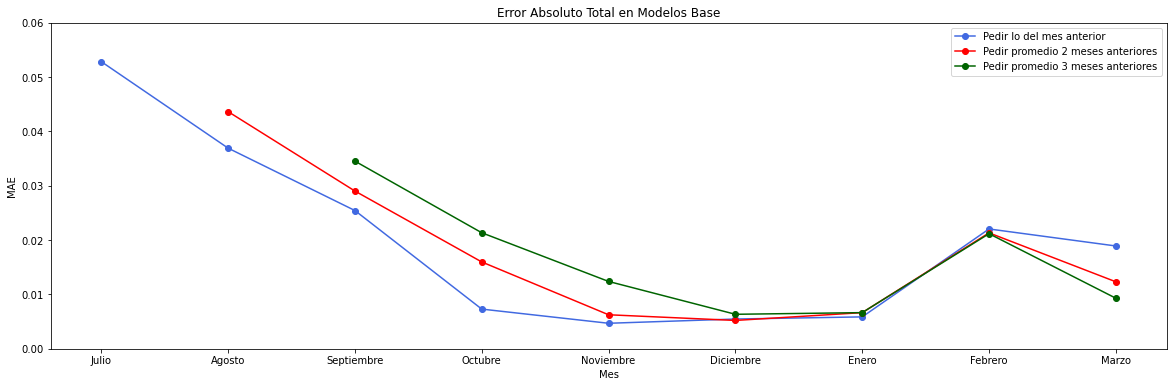

In [53]:
plt.figure(figsize=(20,6)) #impresión de la figura
plt.plot(mae.Mes, mae.mae_pedir_anterior,'-o',color="royalblue")
plt.plot(mae.Mes, mae.mae_promedio_2_meses_anteriores, '-o', color="red")
plt.plot(mae.Mes, mae.mae_promedio_3_meses_anteriores, '-o', color="darkgreen")
plt.legend(['Pedir lo del mes anterior','Pedir promedio 2 meses anteriores','Pedir promedio 3 meses anteriores'])
plt.ylim(0, .06)
plt.ylabel('MAE')
plt.xlabel('Mes')
plt.title('Error Absoluto Total en Modelos Base')

Text(0.5, 1.0, 'Error Absoluto Total en Modelos Base - opción 2')

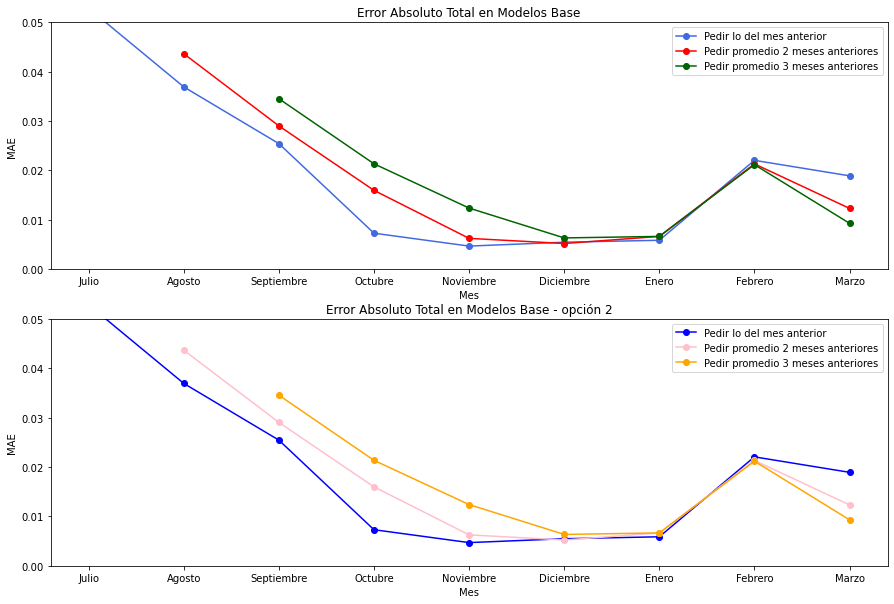

In [54]:
#¡Comando adicional! Dos gráficas (o más) en una figura

plt.figure(figsize=(15,10))

plt.subplot(2, 1, 1)
plt.plot(mae.Mes, mae.mae_pedir_anterior,'-o',color="royalblue")
plt.plot(mae.Mes, mae.mae_promedio_2_meses_anteriores, '-o', color="red")
plt.plot(mae.Mes, mae.mae_promedio_3_meses_anteriores, '-o', color="darkgreen")
plt.legend(['Pedir lo del mes anterior','Pedir promedio 2 meses anteriores','Pedir promedio 3 meses anteriores'])
plt.ylim(0, .05)
plt.ylabel('MAE')
plt.xlabel('Mes')
plt.title('Error Absoluto Total en Modelos Base')

plt.subplot(2,1,2)
plt.plot(mae.Mes, mae.mae_pedir_anterior,'-o',color="blue")
plt.plot(mae.Mes, mae.mae_promedio_2_meses_anteriores, '-o', color="pink")
plt.plot(mae.Mes, mae.mae_promedio_3_meses_anteriores, '-o', color="orange")
plt.legend(['Pedir lo del mes anterior','Pedir promedio 2 meses anteriores','Pedir promedio 3 meses anteriores'])
plt.ylim(0, .05)
plt.ylabel('MAE')
plt.xlabel('Mes')
plt.title('Error Absoluto Total en Modelos Base - opción 2')